# Internal wave forcing

The forcing is a zonally uniform force along the y direction, which avoids the generation of potential vorticity:

$$
\begin{align}
\mathcal{F}_y(x,y,z,t) &= \sum_n f_n(x,y,t) \phi_n(z), \\
f_n(x,y,t) &= \frac{1}{h}\int \phi_n(z) \mathcal{F}_y(x,y,z,t) dz, \\
\end{align}
$$

We'll assume the forcing is a truncated projection of a dirac delta function:


$$
\begin{align}
\mathcal{F}_y^N(x,y,z,t) &= f(x,y,t) \sum_{n\le N} f_n \phi_n(z), \\
f_n &=  \frac{1}{h}\int \phi_n(z) \delta(z)  dz, \\
&= \frac{1}{h} \phi_n(z=0)
\end{align}
$$

We may need to renormalize in order to modulate the global internal wave energy.

The horizontal and temporal structure of the forcings is given by:

$$
\begin{align}
f(x,y,t) &=  f_0 e^{-(y-y_0)^2/L_y^2} \cos (\omega t)
\end{align}
$$



---

# vertical modes


$\phi$ is the vertical structure function of the (u,v,p) and satisfies:

$$
\begin{align}
\frac{d}{dz} \Big (  \frac{1}{N^2} \frac{d}{dz} \phi  \Big )
+ \frac{1}{c^2} \phi = 0, \\
g \frac{d}{dz} \phi + N^2 \phi = 0 
\;\; \mathrm{at} \;\; z=0 \\
\frac{d}{dz} \phi = 0 
\;\; \mathrm{at} \;\; z=-h
\end{align}
$$

where c is the eigenvalue to be determined.
Variables will be projected according to:

$$
\begin{align}
\big [ u, v, p \big ] = 
\sum_m \big [ \hat{u}_m , \hat{v}_m , \hat{p}_m \big ]
\times \phi_m \\
\big [ \rho, w \big ] = 
\sum_m \big [ \hat{\rho}_m, \frac{1}{N^2(z)}\hat{w}_m  \big ]
\times  \frac{d}{dz}\phi_m
\end{align}
$$

Normalization is such that: 

$$
\begin{align}
\frac{1}{h}\int \phi_m^2 dz &= 1, \\
\frac{1}{h}\int \frac{1}{N^2} \Big ( \frac{d}{dz} \phi_n \Big )^2 dz &= \frac{1}{c_n^2} - \frac{\phi_n^2(0)}{gh}.
\end{align}
$$



References: Gill p160, Kloosterziel 1995 
($\hat{p}$ of Gill is $\phi$ of kloorsterziel)



In [1]:
from glob import glob

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt

import numpy as np
import xarray as xr

import xrft

import crocosi.postp as pp
import crocosi.gridop as op
import crocosi.plot as cplt

In [2]:
from dask.distributed import Client, LocalCluster
#
#cluster = LocalCluster()
#
from dask_jobqueue import PBSCluster
cluster = PBSCluster()
w = cluster.scale(jobs=2)
#
client = Client(cluster)
client

Client Scheduler: tcp://10.148.1.68:59016 Dashboard: http://10.148.1.68:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


## Load data

In [3]:
#root_path0 = '/home/c11-data/Test_aponte/fsturb/'
root_path = '/home/datawork-lops-osi/equinox/itbalt/'
#root_path = '/home1/scratch/aponte/'
#root_path = '/home/c11-data/Test_aponte/fsturb/'

run0 = 'fsturb_m0_a1_4km_0a600j'
run = 'itbalt_m0_m1_4km_300a600j'

r0 = pp.Run(root_path+run0, outputs=['surf', 'his'], verbose=1)
r = pp.Run(root_path+run, outputs=['surf', 'his'], verbose=1)
#r['surf'] = r['surf'].assign_coords(time=r['surf'].time_instant.chunk({'time':None}))
#r['his'] = r['his'].assign_coords(time=r['his'].time_counter.chunk({'time':None}))
r['surf'] = r['surf'].assign_coords(time=r['surf'].time_counter)
r['his'] = r['his'].assign_coords(time=r['his'].time_counter)

pout = r.params_output

Analysing directory /home/datawork-lops-osi/equinox/itbalt/fsturb_m0_a1_4km_0a600j
Found 6 segments
Search for parameters in croco.in :
Parameters detected in output.mpi :
Opening datasets: his / surf
Grid size: (L ,M, N) = (258, 722, 50)
Analysing directory /home/datawork-lops-osi/equinox/itbalt/itbalt_m0_m1_4km_300a600j
Found 3 segments
Search for parameters in croco.in :
Parameters detected in output.mpi :
Opening datasets: his / surf
Grid size: (L ,M, N) = (258, 722, 50)


In [4]:
for k, v in pout.items():
    print('{}: {}'.format(k,v))

vtransform: 1
itide_omega: 0.0001454441043
itide_nmode: 2.0
itide_Az: 0.01
itide_y: 400000.0
itide_start_time: 300.0
itideptb_flag: 0.0
itideptb_dcos: -1e-06
itideptb_dsin: 0.0
itideptb_nmode: 2.0
itideptb_scale: 1.0
tdiag_omega: 0.0001454441043
relax_dist_south: 1000000.0
relax_L_south: 350000.0
relax_tau_in_south: 1000.0
relax_tau_out_south: 1.0
relax_dist_north: 1000000.0
relax_L_north: 350000.0
relax_tau_in_north: 1000.0
relax_tau_out_north: 1.0
depth: 4000.0
f0: 0.00010313
beta: 0.0
yrbeta: 1440000.0
ini_flag: 1.0
ini_delta_rho: 0.001
ini_H_tcline: 0.15
ini_H_mld: 0.025
ini_H: 4000.0
itideptb_truth_Acos_mode: [0.00000000e+00 3.71709973e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
itideptb_truth_Asin_mode: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
itideptb_full_Acos_mode: [0.00000000e+00 3.71709973e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.0

---

## utils

In [5]:
def plot_Fy(p, ax=None, scale=1, ls='--', color='k', **kwargs):
    #p = r.params_output
    ymid = p['fst_ymid']*scale
    ywid = p['fst_ywid']*scale
    if ax is not None:
        ax.axhline(ymid-ywid, ls=ls, color=color)
        ax.axhline(ymid+ywid, ls=ls, color=color)
    else:
        plt.axhline(ymid+ywid, ls=ls, color=color)
        plt.axhline(ymid-ywid, ls=ls, color=color)

---

## bulk statistics

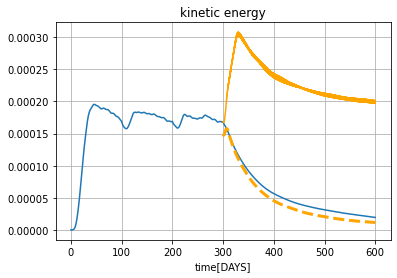

In [8]:
ax = r0.stats['KINETIC_ENRG'].plot(title='kinetic energy')
r.stats['KINETIC_ENRG'].plot(ax=ax, color='orange')
r.stats['BTKIN_ENRG'].plot(ax=ax, lw=3., color=ax.get_lines()[-1].get_color(), 
                           ls='--', label='barotropic')
ax.grid()

--- 

## pictures

### sea level

In [7]:
time_slice = slice(300,600,100)

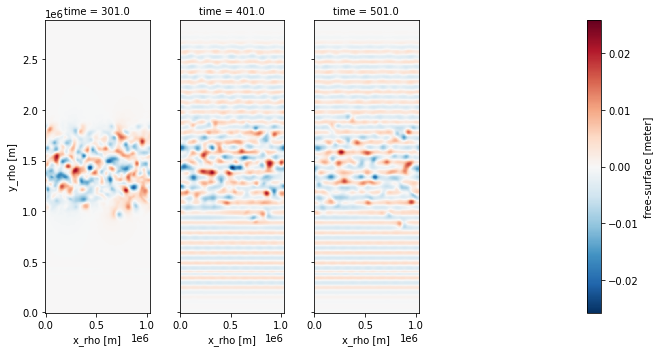

In [8]:
hdl = (r['surf']['ssh'].sel(time=time_slice)
         .plot(x='x_rho', y='y_rho', col='time', col_wrap=4, 
               subplot_kws={'aspect':'equal'},
               aspect=.5, figsize=(10,5))
       )
plot_Fy(pout, ax=hdl.axes[0,-1])

### surface zonal velocity

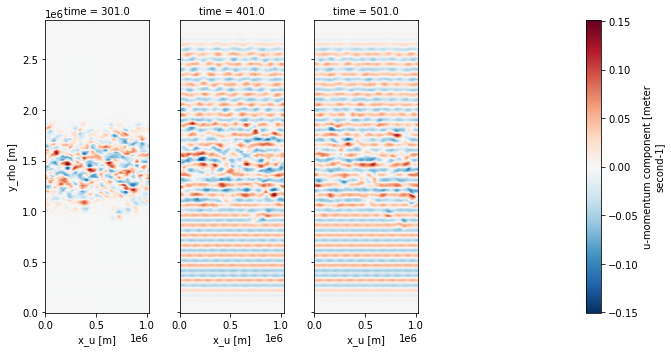

In [9]:
hdl = (r['surf']['u'].sel(time=time_slice)
         .plot(x='x_u', y='y_rho', col='time', col_wrap=4, 
               subplot_kws={'aspect':'equal'},
               aspect=.5, figsize=(10,5))
)
plot_Fy(pout, ax=hdl.axes[0,-1])

---

## vertical slices

In [10]:
z_u = r.get_z(zeta=r['his'].ssh_t_dirac, hgrid='u')
ds = r['his'].assign_coords(z_u = z_u)

In [26]:
time_slice = [320, 420, 520]

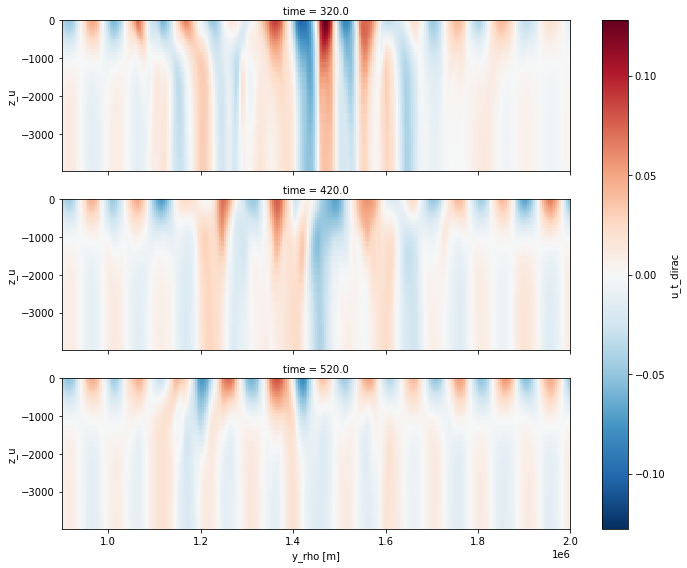

In [27]:
(ds.u_t_dirac
 .isel(x_u=0).sel(time=time_slice)
 .plot(x='y_rho', y='z_u', 
       xlim=(900*1e3,2000*1e3),
       figsize=(10,8),
       col='time', col_wrap=1)
)

---

## vertical mode projections

In [28]:
# load vmodes from croco outputfiles

#vmodes = vmd.Vmodes(r['xgrid'], 
#                    vmodes_croco.zr, vmodes_croco.zw, 
#                    vmodes_croco.N2, 
#                    vmodes_croco.mode.size, 
#                    persist=True)

---

## wavenumber spectra with xrft

In [29]:
u = r['surf']['u'].sel(time=slice(0,None,5))
v = r['surf']['v'].sel(time=slice(0,None,5))

In [30]:
uhat2 = xrft.power_spectrum(r.xgrid.interp(u,'xi', boundary='extend')
                            .chunk({'x_rho': None, 'y_rho': None}),
                            dim=['x_rho','y_rho'], 
                            detrend='constant', window=True).compute()
vhat2 = xrft.power_spectrum(r.xgrid.interp(v,'eta', boundary='extend')
                            .chunk({'x_rho': None, 'y_rho': None}),
                            dim=['x_rho','y_rho'], 
                            detrend='constant', window=True).compute()
ekehat = .5*(uhat2 + vhat2).mean('time').persist()

In [31]:
kx = (ekehat['freq_x_rho']*1e3).rename('kx [1/km]')
ky = (ekehat['freq_y_rho']*1e3).rename('ky [1/km]')

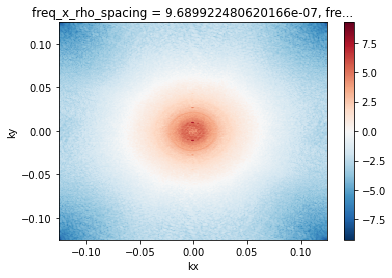

In [32]:
np.log10(ekehat.assign_coords(kx=kx, ky=ky)).plot(x='kx', y='ky') #, subplot_kws={'aspect':'equal'}, aspect=.5, figsize=(5,5))

In [33]:
ekehat_iso = xrft.isotropize(ekehat, ['freq_y_rho','freq_x_rho'])
ekehat_iso = ekehat_iso.assign_coords(k=ekehat_iso.freq_r*1e3)

In [34]:
def add_slope(k_start=None, k_end=None, level_start=None, slope=None):
    if isinstance(slope, list):
        [add_slope(k_start, k_end, level_start, ls) for ls in slope]
    else:
        k = np.arange(k_start,k_end,(k_end-k_start)/3.)
        y = level_start*(k/k[0])**slope
        plt.plot(k, y, 'k')
        plt.text(k[-1], y[-1], ' {i}'.format(i=slope))

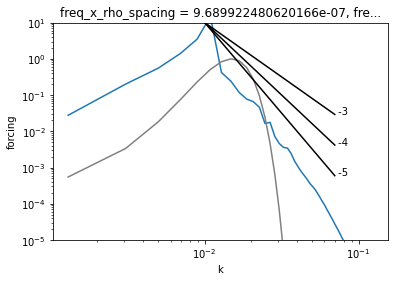

In [35]:
ekehat_iso.plot(x='k', xscale='log', yscale='log')

# get forcing wavenumbers
F_k = 1e3*r.params_output['fst_k']
F_dk = 1e3*r.params_output['fst_dk']
F = np.exp(-((ekehat_iso.k-F_k)/F_dk)**2).rename('forcing')

F.plot(x='k', xscale='log', yscale='log', 
                           ylim=(1e-5, 1e1), color='0.5')

add_slope(k_start=1e-2, k_end=1e-1, level_start=1e1, slope=[-3, -4, -5])

In [36]:
u = r['surf']['u'].sel(time=slice(50,1000,100))
v = r['surf']['v'].sel(time=slice(50,1000,100))
uhat2 = xrft.power_spectrum(r.xgrid.interp(u,'xi', boundary='extend')
                            .chunk({'x_rho': None, 'y_rho': None}),
                            dim=['x_rho','y_rho'], 
                            detrend='constant', 
                            window=True).compute()
vhat2 = xrft.power_spectrum(r.xgrid.interp(v,'eta', boundary='extend')
                            .chunk({'x_rho': None, 'y_rho': None}),
                            dim=['x_rho','y_rho'], 
                            detrend='constant', 
                            window=True).compute()
ekehat = .5*(uhat2 + vhat2)

ekehat_iso = xrft.isotropize(ekehat, ['freq_y_rho','freq_x_rho'])
ekehat_iso = ekehat_iso.assign_coords(k=ekehat_iso.freq_r*1e3)
ekehat_iso = ekehat_iso.persist()

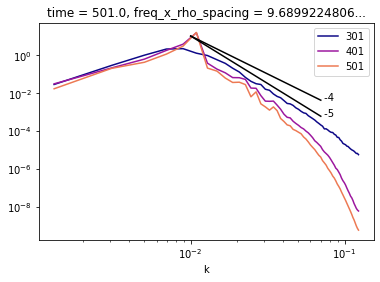

In [37]:
#hdl = ekehat_iso.plot(x='k', hue='time', xscale='log', yscale='log')
#
colors = cplt.get_cmap_colors(ekehat_iso.time.size)
for t, c in zip(ekehat_iso.time, colors):
    ekehat_iso.sel(time=t).plot(x='k', color=c,
                                xscale='log', yscale='log',
                                label='{t}'.format(t=int(t)))
plt.legend()
#add_slope(1e-2, 1e-1, 1e-2, [-4,-5])
add_slope(k_start=1e-2, k_end=1e-1, level_start=1e1, slope=[-4, -5])

---

## make movies

In [9]:
def atom(ax, da, ax_kwargs, test=None, **plt_kwargs):
    #
    xc = next((x for x in da.dims if x[0]=='x'), False)
    yc = next((x for x in da.dims if x[0]=='y'), False)
    da = da.assign_coords(x=da[xc]/1e3, y=da[yc]/1e3)
    #
    d = int(da.time)
    title = da.name+' day = %d'%(d)
    #h = (_da.time-d)*24
    #title = da.name+' day = %d / h = %.2f hour '%(d, h)
    #
    da.plot(x='x',y='y', ax=ax, **plt_kwargs)
    plot_Fy(pout, ax=ax, scale=1e-3)
    ax.set_aspect('equal', 'box')
    ax.set(**ax_kwargs)
    ax.set_title(title)

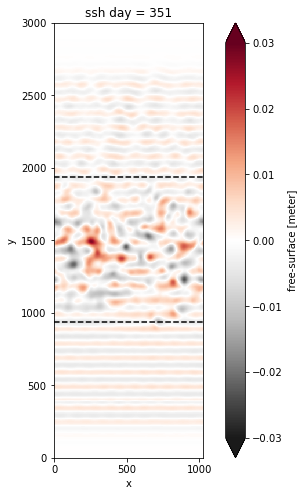

In [12]:
ssh = r['surf']['ssh']

da = ssh
plt_kw = {'vmin': -.03, 'vmax': .03, 'cmap': 'RdGy_r', 
          'extend':'both'}
ax_kw = {'ylim': (0, 3000)}
cplt.movie_figure(atom, da, i=50, test=True, figsize=(8,8), 
                  ax_kwargs=ax_kw, **plt_kw)

In [15]:
cplt.movie_wrapper(atom, client, da,
                   figsize=(8,8),
                   ax_kwargs=ax_kw, 
                   **plt_kw)
# for some reason, breaks if on a local (1 node) cluster
# with typical matplotlib thread issue:
# https://github.com/pydata/xarray/issues/1889

5 batches to be done
 batch 0-59
 batch 60-119
 batch 120-179
 batch 180-239
 batch 240-299


---

In [ ]:
cluster.close()